In [1]:
# import required libraries
import pandas as pd
from pandas import Series, DataFrame, read_table
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2]:
#importing dataset
df = pd.read_excel('1645792390_cep1_dataset (1).xlsx', index_col=0).reset_index()

In [3]:
#df.reset_index(inplace=True) is another way to reset the dataset

In [4]:
#structure of data
df.shape
#303 row and 14 columns

(303, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#check for duplicates
#we define a duplicate as a record that is matching on all variables
df_dedup = df.drop_duplicates(subset=['sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'])

In [7]:
df_dedup.shape

(302, 14)

In [8]:
df_dedup.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#check for null / invalid values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#check for nulls within the columns
df.isnull().sum(axis = 0)
#obs: we found no missing values within this data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#removing duplicates from the dataset
df.drop_duplicates(subset=['sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'], inplace=True)

In [12]:
#determine the types of data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [13]:
#check the range of data to ensure that you inputting quality data into your model
df['restecg'].describe()

count    302.000000
mean       0.526490
std        0.526027
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64

In [14]:
df['thalach'].describe()

count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [15]:
#restecg resting electrocardiographic results
df['restecg_cat'] = df.apply(lambda x: 'zero' if x['restecg'] == 0 else 'non-zero', axis=1)
df['restecg_cat'].value_counts()

non-zero    155
zero        147
Name: restecg_cat, dtype: int64

In [16]:
#thalach Maximum heart rate achieved
df['thalach_cat'] = df.apply(lambda x: 'zero' if x['thalach'] == 0 else 'non-zero', axis=1)
df['thalach_cat'].value_counts()

non-zero    302
Name: thalach_cat, dtype: int64

In [17]:
#Checking to see how many targets in the dataset
#the target is a category call
df['cvd_cat'] = df.apply(lambda x: 'mci' if x['target'] == 1 else 'no-mci', axis=1)
df['cvd_cat'].value_counts()

mci       164
no-mci    138
Name: cvd_cat, dtype: int64

In [18]:
#describe the dataset
df.describe()
#the average age is 54 years old with standard deviation of 9 and 75% of individuals are younger than 61 years old.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df[['age', 'trestbps', 'chol', 'thalach', 'exang', 'restecg', 'fbs', 'cp', 'sex']].describe()

,age,trestbps,chol,thalach,exang,restecg,fbs,cp,sex
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,0.327815,0.526490,0.149007,0.963576,0.682119
std,9.04797,17.563394,51.753489,22.903527,0.470196,0.526027,0.356686,1.032044,0.466426
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.000000,1.000000,0.000000,2.000000,1.000000
max,77.00000,200.000000,564.000000,202.000000,1.000000,2.000000,1.000000,3.000000,1.000000


In [20]:
df_cols = ['slope', 'ca', 'thal', 'target', 'exang', 'restecg', 'fbs', 'cp', 'sex']

for cols in df_cols:
    print(df[cols].value_counts())

2    141
1    140
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64
2    165
3    117
1     18
0      2
Name: thal, dtype: int64
1    164
0    138
Name: target, dtype: int64
0    203
1     99
Name: exang, dtype: int64
1    151
0    147
2      4
Name: restecg, dtype: int64
0    257
1     45
Name: fbs, dtype: int64
0    143
2     86
1     50
3     23
Name: cp, dtype: int64
1    206
0     96
Name: sex, dtype: int64


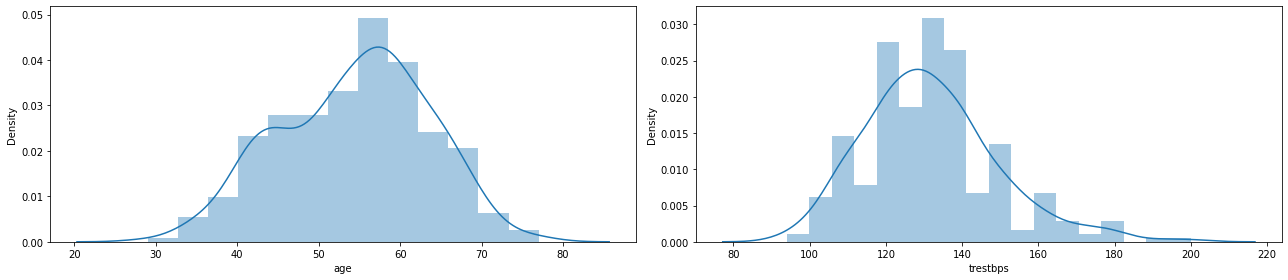

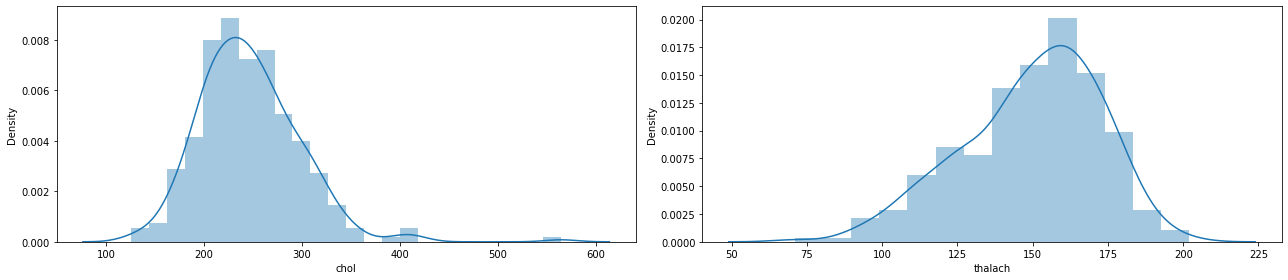

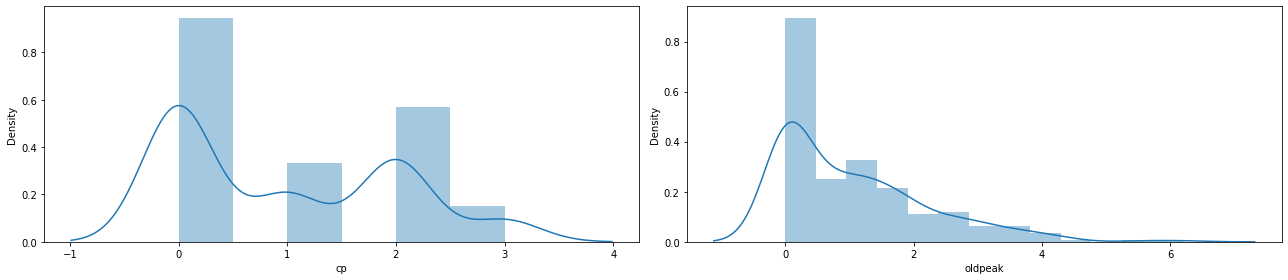

In [21]:
#plot the data in a histogram and kernel density plot
import seaborn as sns

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'cp', 'oldpeak']

for i in range(0,len(num_cols),2):
    plt.figure(figsize=(18,4))
    plt.subplot(121)
    sns.distplot(df[num_cols[i]], hist=True, kde=True)
    plt.subplot(122)
    sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
    plt.tight_layout()
    plt.show()

<AxesSubplot:>

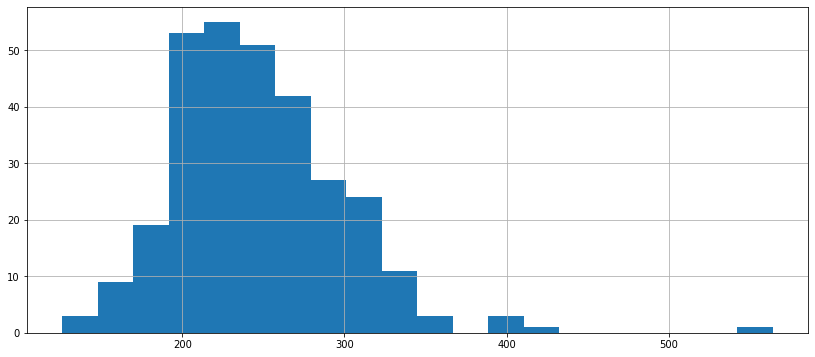

In [22]:
# visualizing the indivdual column with the Histogram
df['chol'].hist(figsize=(14,6), bins=20)

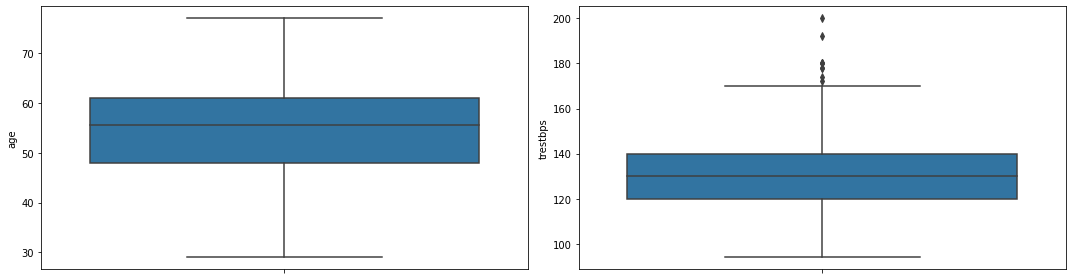

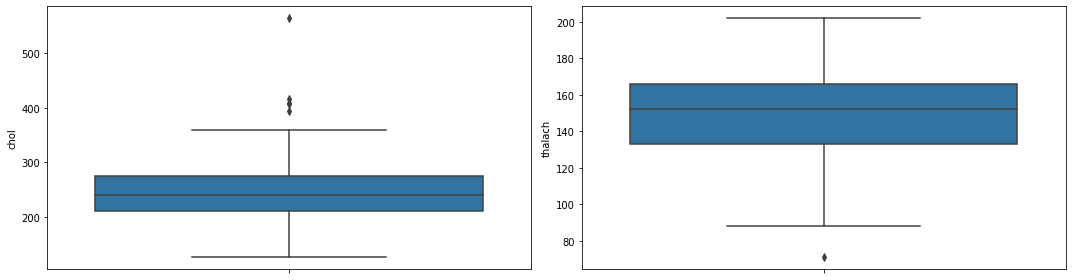

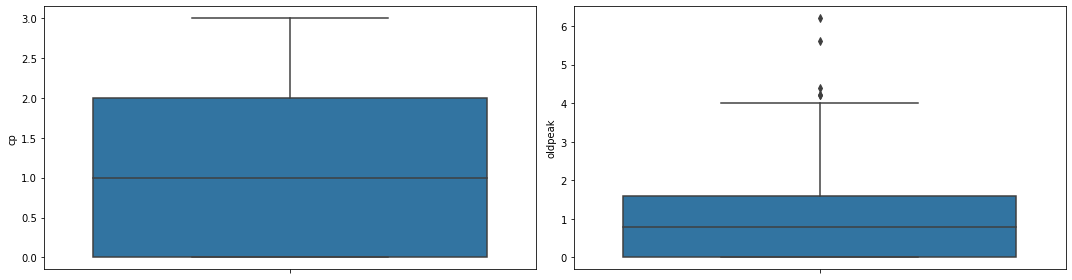

In [23]:
facet = None

for i in range(0,len(num_cols),2):
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.boxplot(facet, num_cols[i], data = df)
    plt.subplot(122)
    sns.boxplot(facet, num_cols[i+1], data = df)
    plt.tight_layout()
    plt.show()

In [24]:
df.dtypes

age              int64
sex              int64
cp               int64
trestbps         int64
chol             int64
fbs              int64
restecg          int64
thalach          int64
exang            int64
oldpeak        float64
slope            int64
ca               int64
thal             int64
target           int64
restecg_cat     object
thalach_cat     object
cvd_cat         object
dtype: object

In [25]:
df_cols = ['slope', 'ca', 'thal', 'target', 'exang', 'restecg', 'fbs', 'cp', 'sex']

for col in df_cols:
    print(df[col].value_counts())

2    141
1    140
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64
2    165
3    117
1     18
0      2
Name: thal, dtype: int64
1    164
0    138
Name: target, dtype: int64
0    203
1     99
Name: exang, dtype: int64
1    151
0    147
2      4
Name: restecg, dtype: int64
0    257
1     45
Name: fbs, dtype: int64
0    143
2     86
1     50
3     23
Name: cp, dtype: int64
1    206
0     96
Name: sex, dtype: int64


<AxesSubplot:>

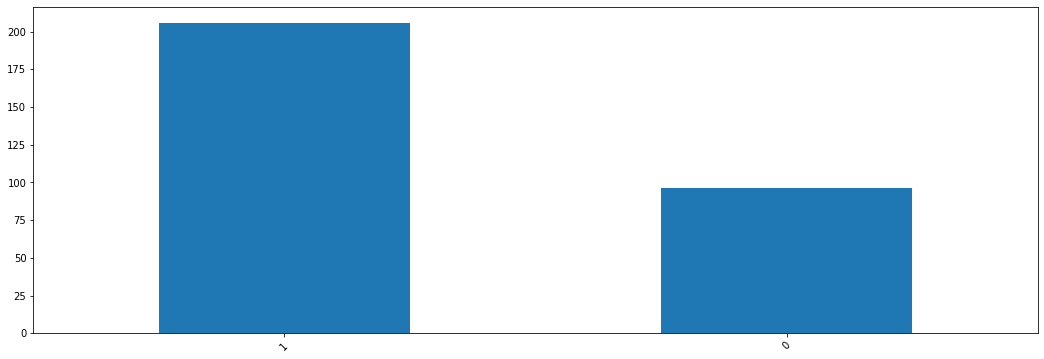

In [26]:
#vizualize individual column data in a barplot
df['sex'].value_counts().plot(kind='bar', rot=45, fontsize=10, figsize=(18,6))

In [27]:
207/302

0.6854304635761589

In [28]:
#Obs: there are 207 males in our data (69% of recorded values) 

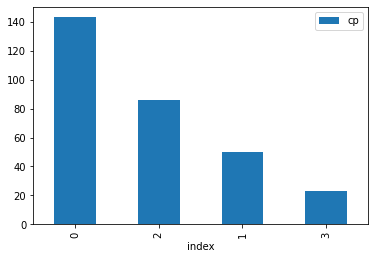

In [29]:
a = df['cp'].value_counts()
b=a.reset_index()
ax = b.plot.bar(x='index', y='cp')

In [30]:
b
#Counting the number of cp

,index,cp
0,0,143
1,2,86
2,1,50
3,3,23


In [31]:
df['cp'].count()

302

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


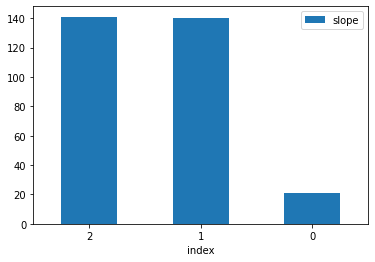

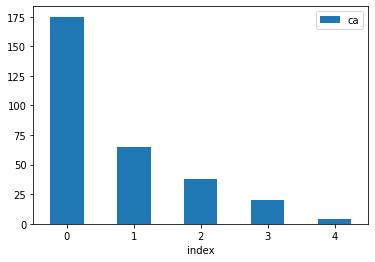

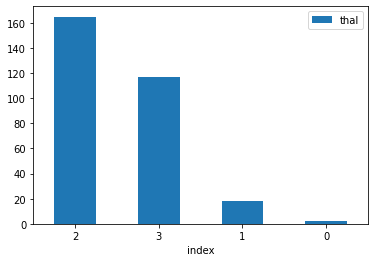

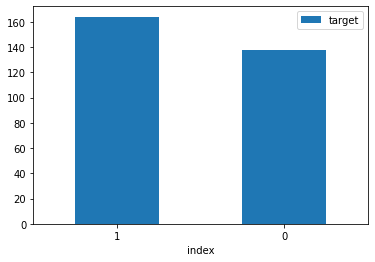

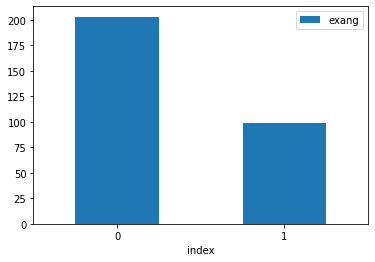

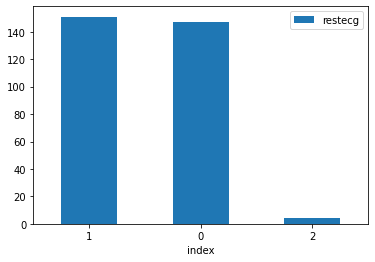

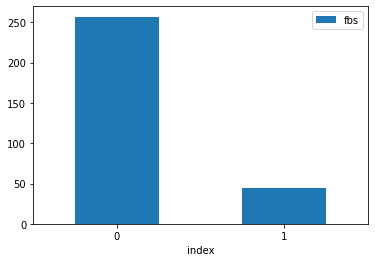

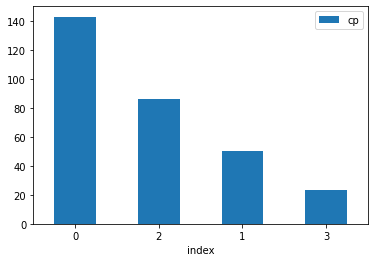

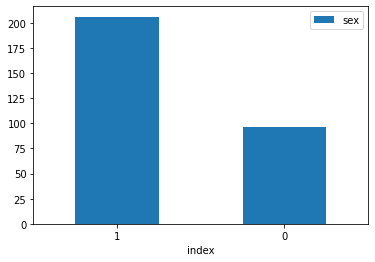

In [32]:
df_cols = ['slope', 'ca', 'thal', 'target', 'exang', 'restecg', 'fbs', 'cp', 'sex']
for col in df_cols:
    a = df[col].value_counts()
    b=a.reset_index()
    print(b.plot.bar(x='index', y=col, rot=0))

In [33]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [34]:
df['age'].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [35]:
#the average age for those with CVD (target=1)
df.groupby('target')['age'].mean()

target
0    56.601449
1    52.585366
Name: age, dtype: float64

In [36]:
df.groupby('target')['age'].median()

target
0    58
1    52
Name: age, dtype: int64

In [37]:
df.groupby('target')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.00,58.0,62.0,77.0
1,164.0,52.585366,9.511957,29.0,44.75,52.0,59.0,76.0


In [38]:
df['age'].describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [39]:
df['age_cat'] = df.apply(lambda x: 'a' if x['age'] <55 else 'b', axis=1)
df['age_cat'].value_counts()

b    159
a    143
Name: age_cat, dtype: int64

In [40]:
df['age_cat'] = df.apply(lambda x: 'a' if x['age'] <50 else \
                         ('b' if ((x['age'] >= 50) & (x['age'] <= 60)) else 'c'), axis=1)
df['age_cat'].value_counts()

b    136
a     87
c     79
Name: age_cat, dtype: int64

In [41]:
df['age_cat'] = df.apply(lambda x: 'a' if x['age'] <50 else \
                         ('b' if ((x['age'] >= 50) & (x['age'] <= 55)) else \
                          ('c' if ((x['age'] >= 55) & (x['age'] <=60)) else 'd')), axis=1)
df['age_cat'].value_counts()

a    87
d    79
c    72
b    64
Name: age_cat, dtype: int64

In [42]:
df['age_cat_1'] = df.apply(lambda x: '<= 55yrs old' if x['age'] <= 55 else '> 55 yrs old', axis=1)
df['age_cat_1'].value_counts()

<= 55yrs old    151
> 55 yrs old    151
Name: age_cat_1, dtype: int64

In [43]:
df['age_cat_2'] = df.apply(lambda x: 'a' if x['age'] <50 else \
                         ('b' if ((x['age'] >= 50) & (x['age'] <= 55)) else \
                          ('c' if ((x['age'] >= 55) & (x['age'] <=60)) else 'd')), axis=1)
df['age_cat_2'].value_counts()

a    87
d    79
c    72
b    64
Name: age_cat_2, dtype: int64

In [44]:
df['age_cat_3'] = df.apply(lambda x: 'a' if x['age'] <50 else \
                         ('b' if ((x['age'] >= 50) & (x['age'] <= 55)) else \
                          ('c' if ((x['age'] >= 55) & (x['age'] <=60)) else 'd')), axis=1)
df['age_cat_3'].value_counts()

a    87
d    79
c    72
b    64
Name: age_cat_3, dtype: int64

In [45]:
#bivariate analysis of age group vs CVD
pd.crosstab(df['age_cat_1'], df['target'], rownames=['age_cat'], colnames=['target'])

target,0,1
age_cat,,
<= 55yrs old,49,102
> 55 yrs old,89,62


In [46]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [47]:
pd.crosstab(df['sex'], df['target'], rownames=['sex'], colnames=['target'])
#A has been identified that a greater proportion (96) of females (i.e. target 1) are diagnosed with cardiovasculardisease when compared to males (72)

target,0,1
sex,,
0,24,72
1,114,92


In [48]:
df.groupby('sex')['chol'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,96.0,261.302083,65.088946,141.0,214.75,253.0,296.75,564.0
1,206.0,239.601942,42.649757,126.0,208.75,235.0,268.50,353.0


In [50]:
a = df.groupby('sex')['age', 'trestbps', 'chol', 'thalach'].mean()
a.reset_index()

,sex,age,trestbps,chol,thalach
0,0,55.677083,133.083333,261.302083,151.12500
1,1,53.834951,130.912621,239.601942,148.84466


<AxesSubplot:xlabel='sex'>

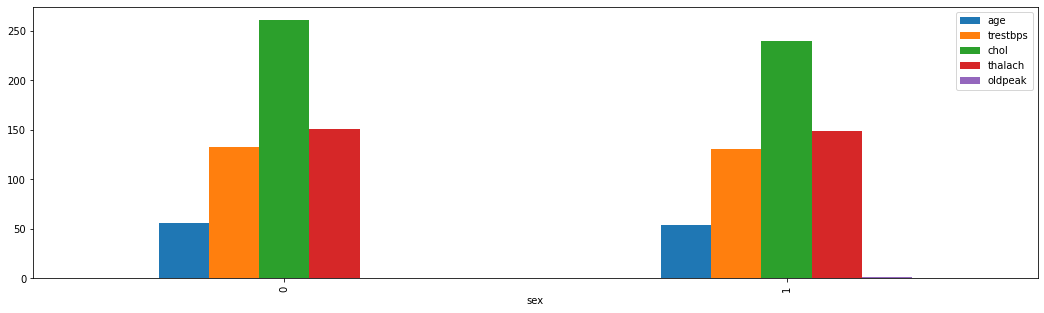

In [51]:
df_ct = df.groupby('sex')['age', 'trestbps', 'chol', 'thalach', 'oldpeak'].mean().reset_index()
df_ct.plot(x = 'sex',
           y=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],
           kind= 'bar',
           fontsize=10, figsize=(18,5))

In [54]:
a = pd.crosstab(df['sex'], df['cp'], rownames=['age_cat'], colnames=['target']).reset_index()
a

target,age_cat,0,1,2,3
0,0,39,18,35,4
1,1,104,32,51,19


<AxesSubplot:xlabel='sex'>

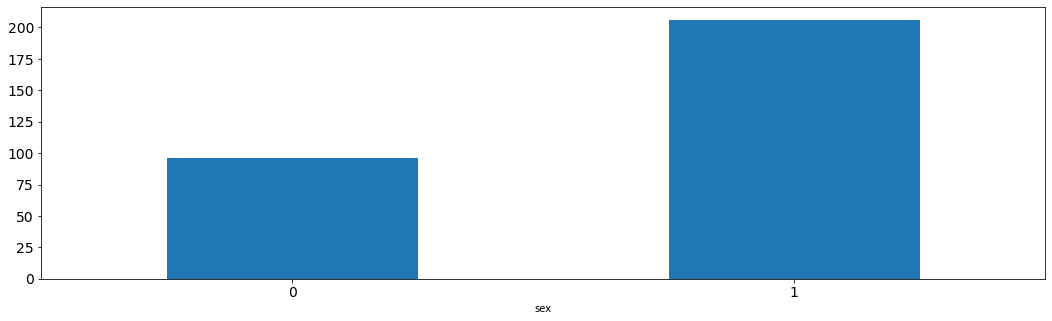

In [55]:
df.groupby('sex')['cp'].count().plot(kind='bar', rot=0, fontsize=14, figsize=(18,5), xlabel='sex')

In [60]:
df.groupby('target')['trestbps'].describe()
#What we see is that there is no major difference when comparing resting blood pressure to cardiovascular disease among patients.

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,134.398551,18.729944,100.0,120.0,130.0,144.75,200.0
1,164.0,129.250000,16.204739,94.0,120.0,130.0,140.00,180.0


<AxesSubplot:xlabel='target', ylabel='trestbps'>

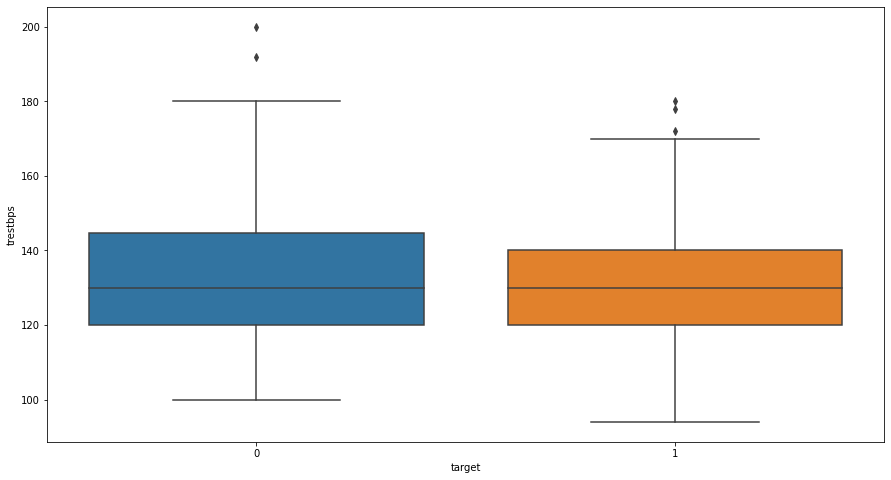

In [61]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.xticks(rotation = 0)
sns.boxplot('target', 'trestbps', data=df)

In [72]:
pd.crosstab(df['restecg_cat'], df['target'],
            rownames=['restecg_cat'], colnames=['target'])

target,0,1
restecg_cat,,
non-zero,59,96
zero,79,68


<AxesSubplot:xlabel='cvd_cat', ylabel='restecg_cat'>

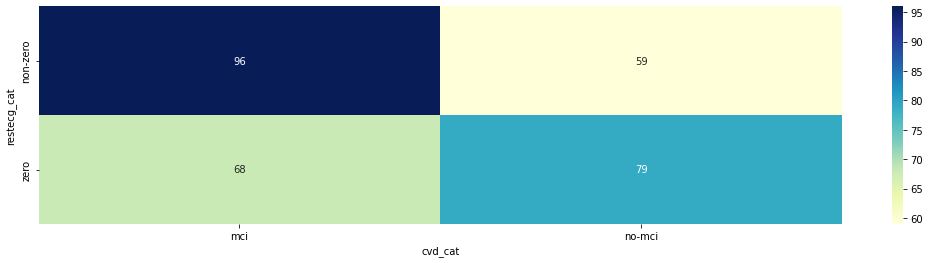

In [73]:
contingency = pd.crosstab(df['restecg_cat'], df['cvd_cat'],
                          rownames=['restecg_cat'], colnames=['cvd_cat'])
plt.figure(figsize=(18,4))
sns.heatmap(contingency, annot=True, cmap='YlGnBu')
                                                

In [74]:
#if p variable is less than 0.05, we are observing that the data is statistically said netiquette
c, p, dof, expected = chi2_contingency(contingency)
p

0.008844536801280885

In [75]:
df.groupby('target')['chol'].describe()
#obs: among those with target being zero, there is a greater average cholesterol compared to target being 1

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,251.086957,49.454614,131.0,217.25,249.0,283.00,409.0
1,164.0,242.640244,53.456580,126.0,208.75,234.5,267.25,564.0


<AxesSubplot:xlabel='target'>

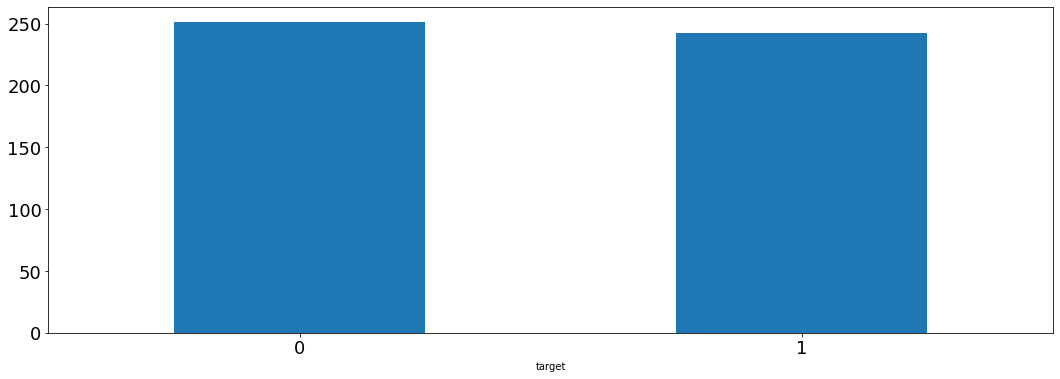

In [77]:
df.groupby('target')['chol'].mean().plot(kind='bar', rot=0, fontsize=18, figsize=(18,6))

<AxesSubplot:xlabel='target', ylabel='chol'>

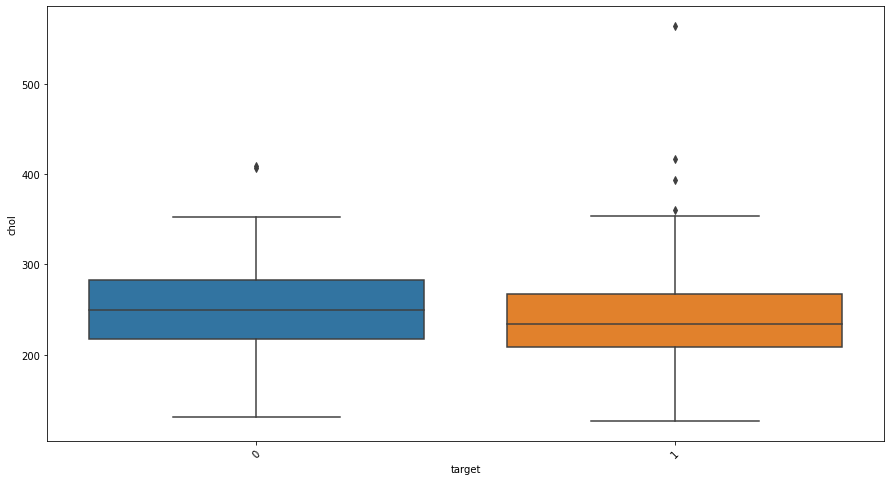

In [80]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('target', 'chol', data=df)
#After visualizing the data in a box plot, we can tell that there are significant outliers (very high levels of cholesterol) with those who have CVD compared to those who don’t.   

In [82]:
import statsmodels.formula.api as smf

m1 = smf.logit(
    formula='target ~ chol',
    data=df) \
.fit()

m1.summary()
#What we observed by using a bivariate model by using a single logistic regression model shows cholesterol is not a significant variable in predicting cardiovascular disease.

Optimization terminated successfully.
         Current function value: 0.686111
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                0.004824
Time:                        16:43:31   Log-Likelihood:                -207.21
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                    0.1564
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9598      0.573      1.676      0.094      -0.163       2.082
chol          -0.0032      0.002     -1.404      0.160      -0.008       0.001
==============================================================================
"""

In [83]:
df['slope'].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='target'>

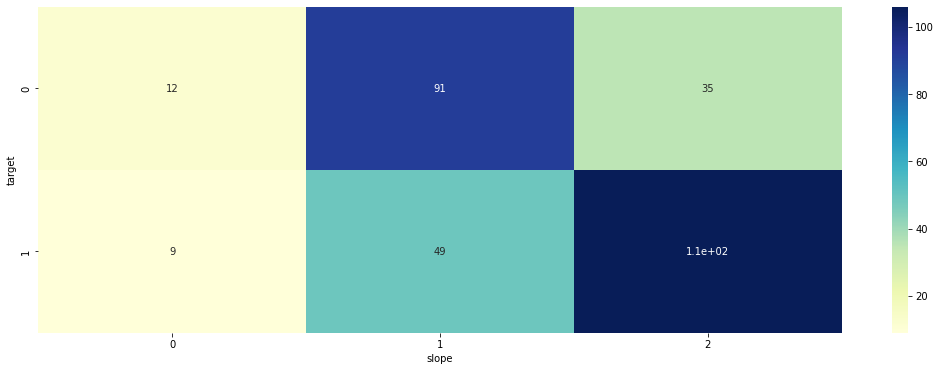

In [84]:
#c= df.groupby('target')['slope'].value_counts().reset_index()

contingency = pd.crosstab(df['target'], df['slope'],
                          rownames=['target'], colnames=['slope'])
plt.figure(figsize=(18,6))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [85]:
contingency

slope,0,1,2
target,,,
0,12,91,35
1,9,49,106


In [86]:
c, p, dof,expected = chi2_contingency(contingency)
p

6.5777827609179e-11

In [87]:
import statsmodels.formula.api as smf

m1 = smf.logit(
    formula='target ~ slope',
    data=df) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.627936
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                 0.08920
Time:                        17:12:44   Log-Likelihood:                -189.64
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 1.096e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5234      0.321     -4.739      0.000      -2.153      -0.893
slope          1.2206      0.214      5.708      0.000       0.801       1.640
==============================================================================
"""

In [88]:
df['thal'].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [89]:
contingency = pd.crosstab(df['target'], df['thal'],
                          rownames=['target'], colnames=['thal'])
contingency
#among those with no thalassemia, a smaller proportion had CVD

thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,129,28


<AxesSubplot:xlabel='thal', ylabel='target'>

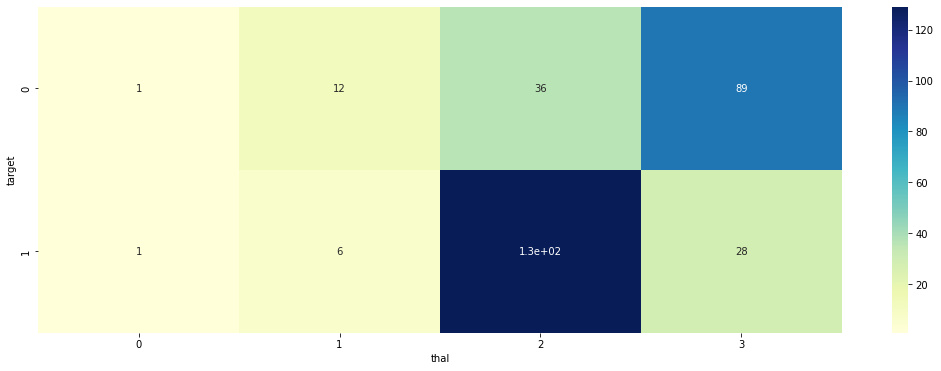

In [91]:
contingency = pd.crosstab(df['target'], df['thal'],
                          rownames=['target'], colnames=['thal'])
plt.figure(figsize=(18,6))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [94]:
m1 = smf.logit(
    formula='target ~ thal',
    data=df) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.626279
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                 0.09161
Time:                        17:36:44   Log-Likelihood:                -189.14
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 6.561e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1811      0.545      5.834      0.000       2.112       4.250
thal          -1.2851      0.225     -5.718      0.000      -1.726      -0.845
==============================================================================
"""

In [97]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'restecg_cat',
       'thalach_cat', 'cvd_cat', 'age_cat', 'age_cat_1', 'age_cat_2',
       'age_cat_3'],
      dtype='object')

In [98]:
m1 = smf.logit(
    formula='target ~ age',
    data=df) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.664330
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                 0.03642
Time:                        17:46:45   Log-Likelihood:                -200.63
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 9.853e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9876      0.759      3.936      0.000       1.500       4.475
age           -0.0515      0.014     -3.770      0.000      -0.078      -0.025
==============================================================================
"""

In [99]:
m1 = smf.logit(
    formula='target ~ sex',
    data=df) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.647667
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                 0.06058
Time:                        17:48:49   Log-Likelihood:                -195.60
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 5.092e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0986      0.236      4.661      0.000       0.637       1.561
sex           -1.3130      0.274     -4.788      0.000      -1.850      -0.776
==============================================================================
"""

In [100]:
m1 = smf.logit(
    formula='target ~ fbs',
    data=df) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.689078
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:               0.0005206
Time:                        17:49:53   Log-Likelihood:                -208.10
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                    0.6415
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1952      0.125      1.557      0.119      -0.051       0.441
fbs           -0.1507      0.323     -0.466      0.641      -0.785       0.483
==============================================================================
"""

In [101]:
m1 = smf.logit(
    formula='target ~ exang',
    data=df) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.591351
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.1423
Time:                        17:50:25   Log-Likelihood:                -178.59
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 1.393e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8216      0.152      5.392      0.000       0.523       1.120
exang         -2.0169      0.283     -7.137      0.000      -2.571      -1.463
==============================================================================
"""

In [102]:
m1 = smf.logit(
    formula='target ~ oldpeak',
    data=df) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.586804
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.1489
Time:                        17:50:55   Log-Likelihood:                -177.21
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 3.452e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1096      0.181      6.124      0.000       0.754       1.465
oldpeak       -0.9352      0.139     -6.749      0.000      -1.207      -0.664
==============================================================================
"""

In [103]:
m1 = smf.logit(
    formula='target ~ ca',
    data=df) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.598696
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.1316
Time:                        17:51:27   Log-Likelihood:                -180.81
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 1.329e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8384      0.156      5.385      0.000       0.533       1.144
ca            -0.9818      0.153     -6.415      0.000      -1.282      -0.682
==============================================================================
"""

In [104]:
#Cholestrol is not a predictor
# Thal an slpe are significant
#age is a significant predictor of CVD
#sex is not a significant predictor of CVD
#fbs is not a significant predictor of CVD
#exang is not a significant predictor of CVD
#oldpeak is not a significant predictor of CVD
#ca is not a significant predictor of CVD

In [105]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trestbps'>,
        <AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thalach', ylabel='trestbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trestbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalach', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='thalach'>,
        <AxesSubplot:xlabel='trestbps', ylabel='thalach'>,
        <AxesSubplot:xlabel='chol', ylabel='thalach'>,
       

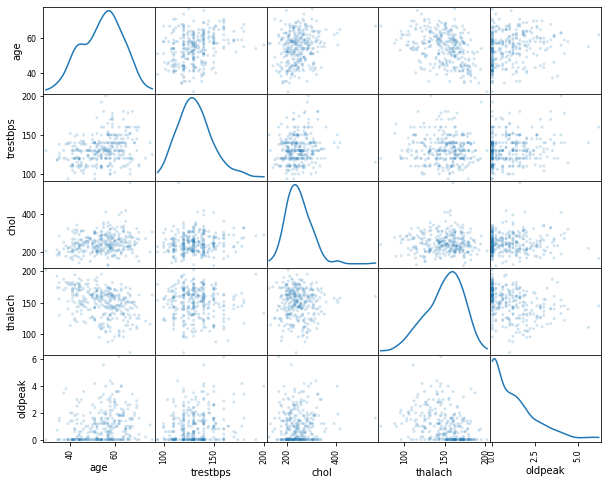

In [109]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], alpha = 0.2, figsize=(10,8), diagonal = 'kde')

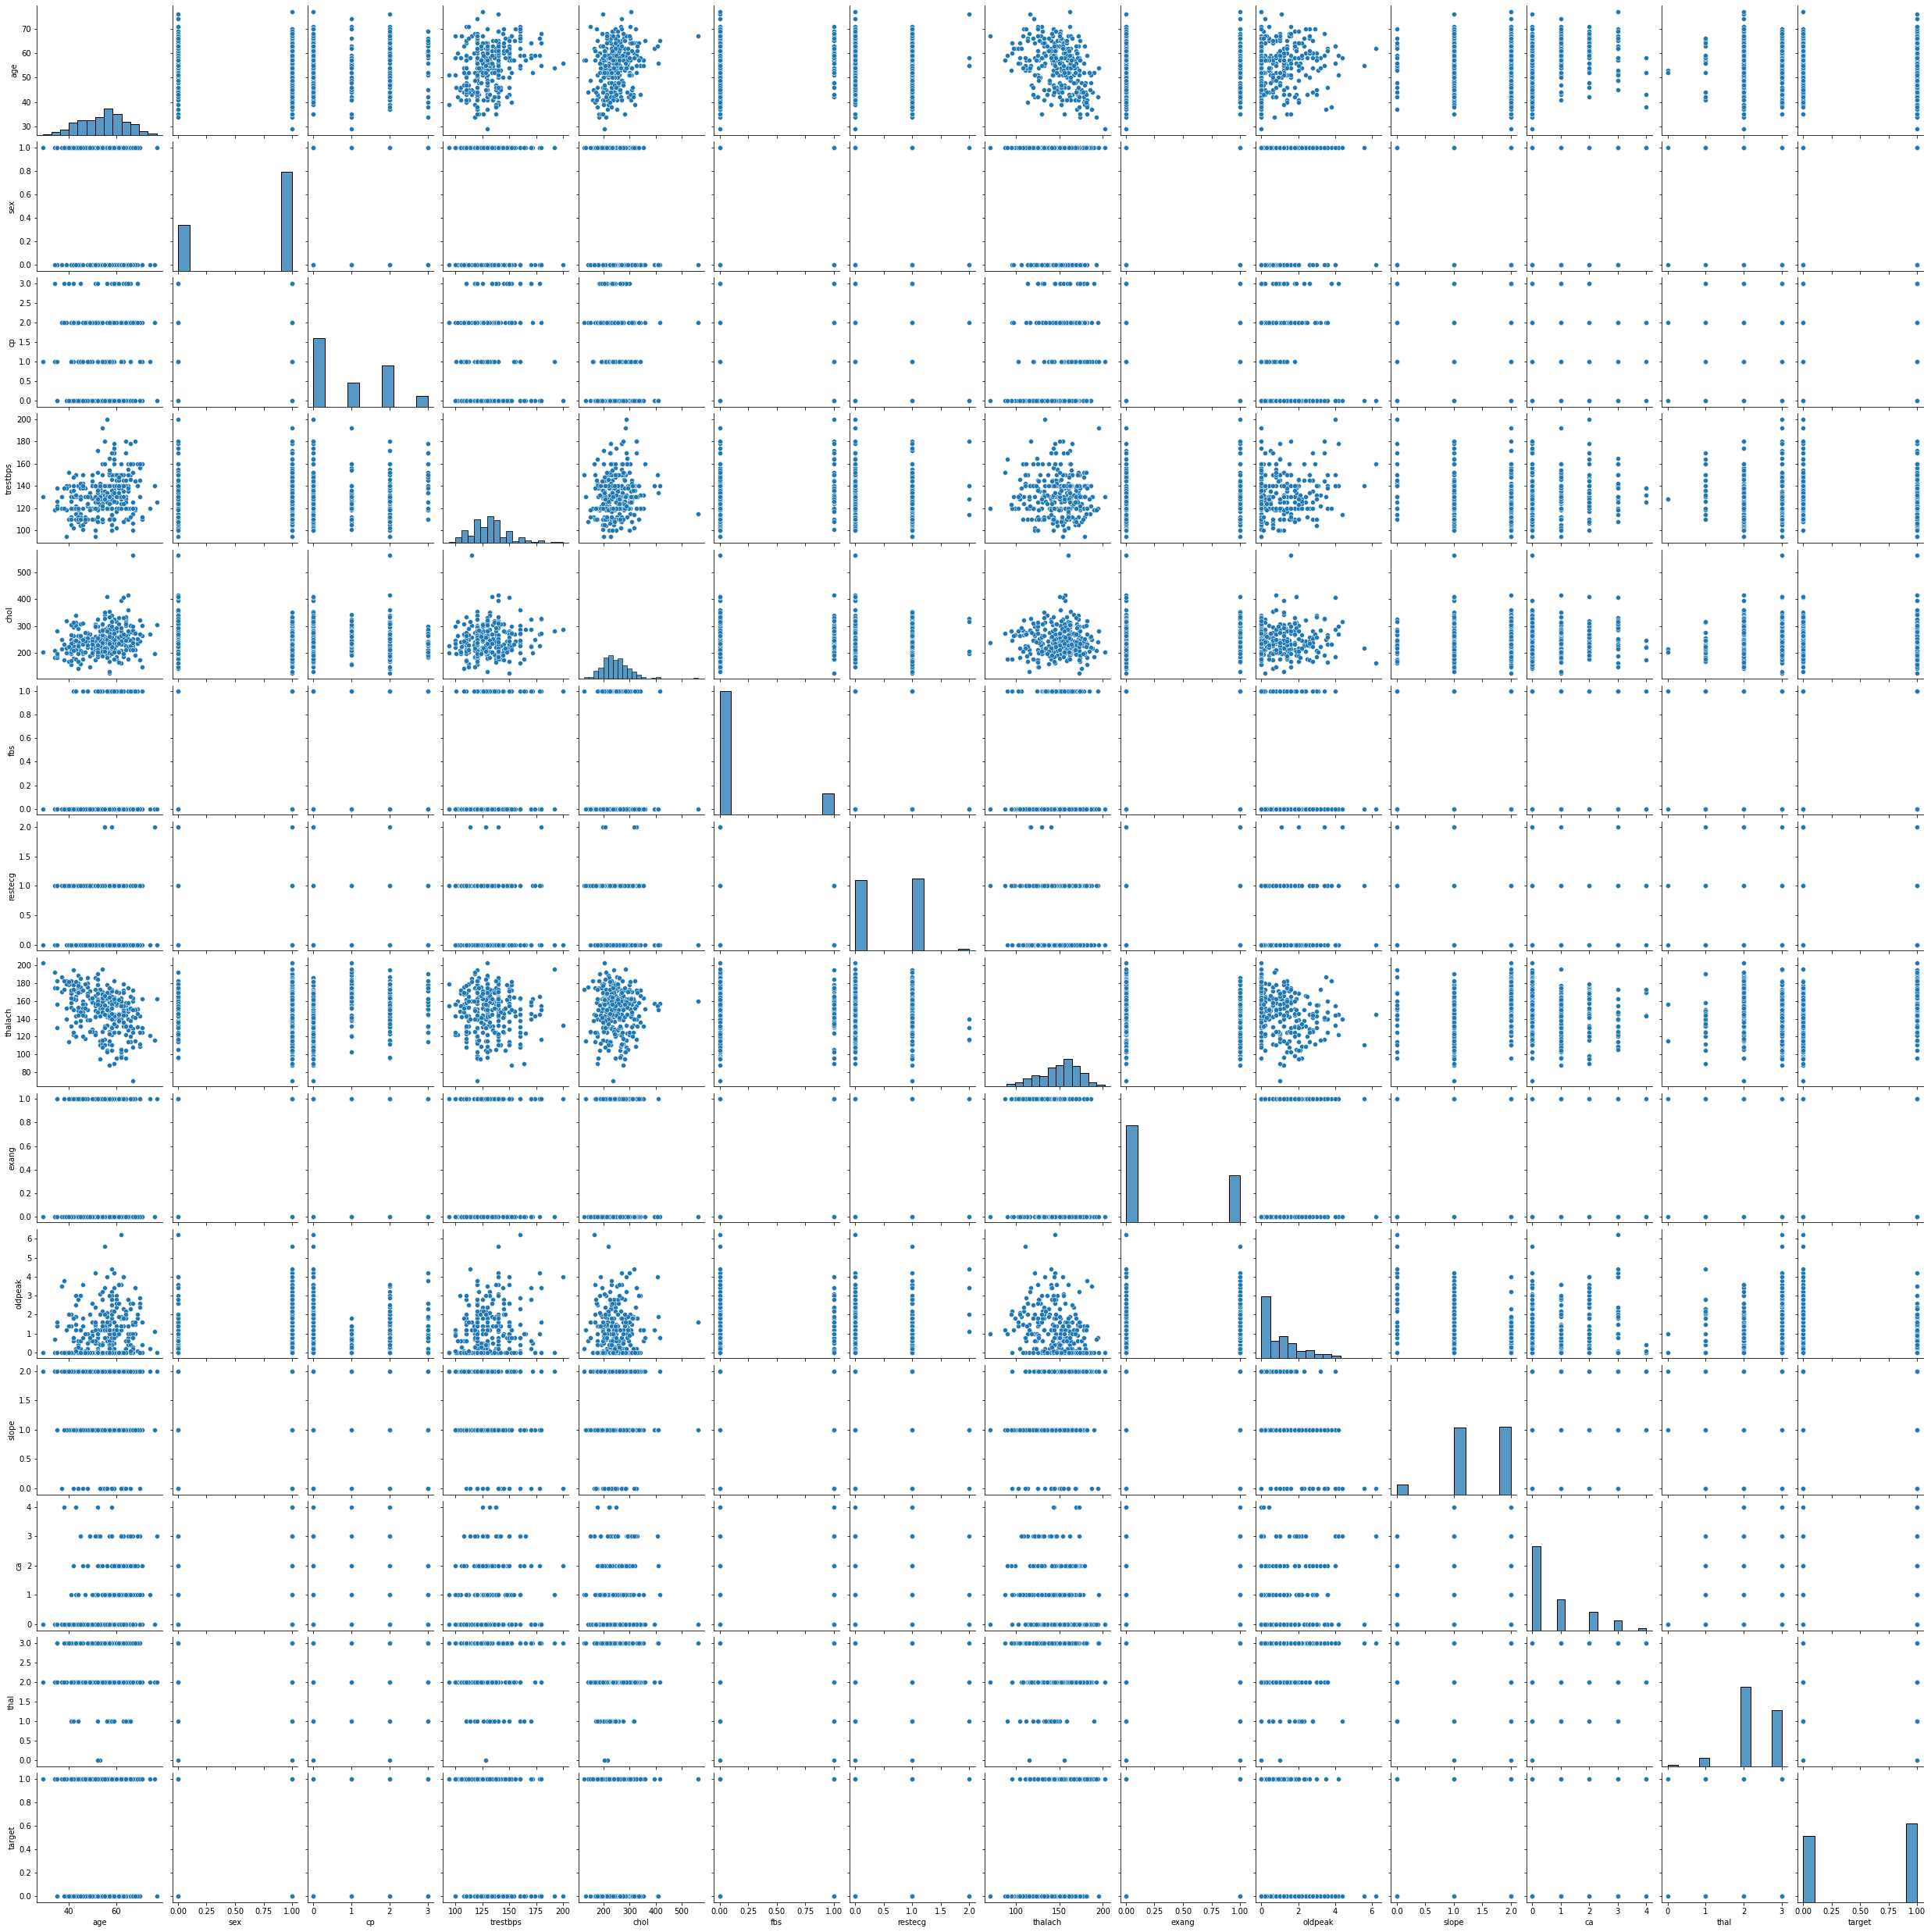

In [111]:
sns.pairplot(df)

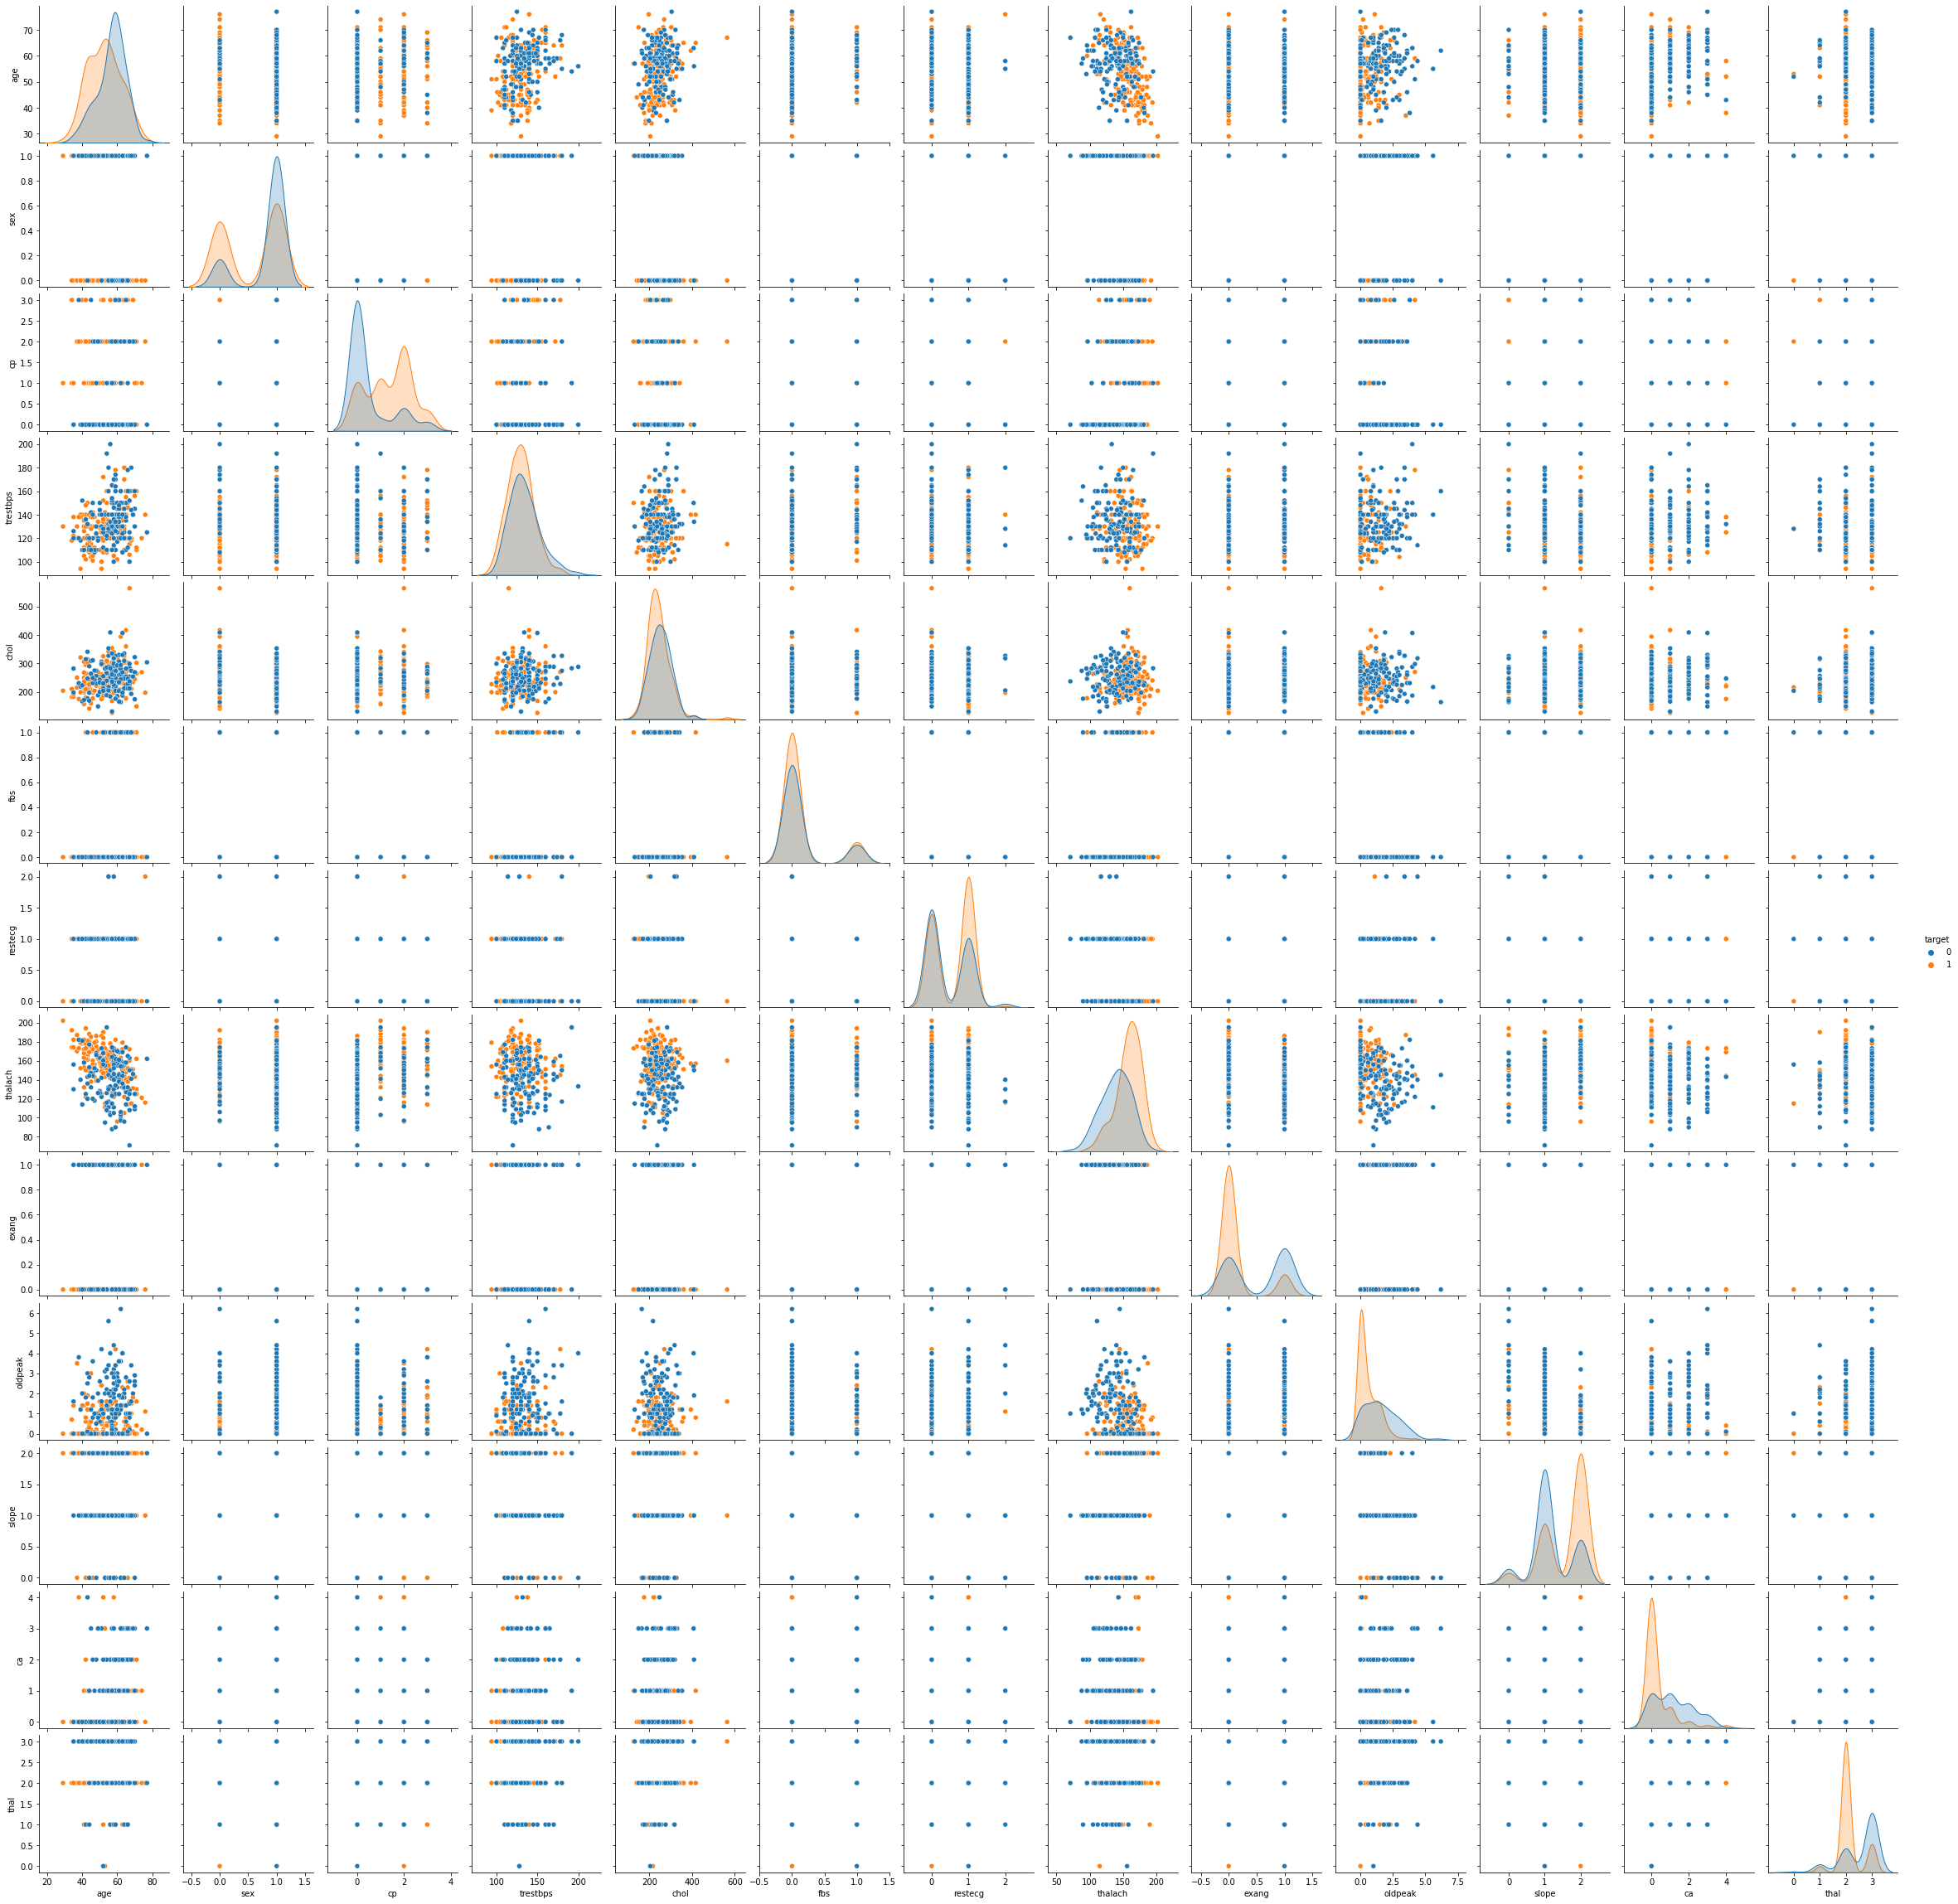

In [112]:
sns.pairplot(df, hue='target')

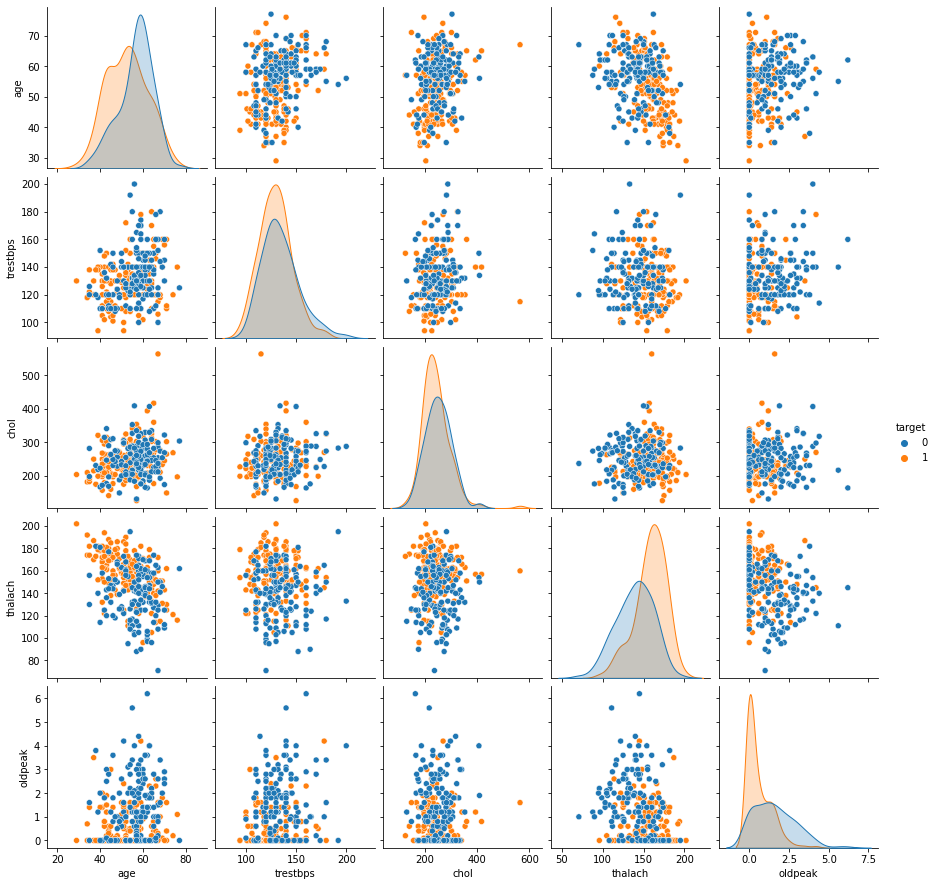

In [113]:
sns.pairplot(df[['target', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']], hue='target')

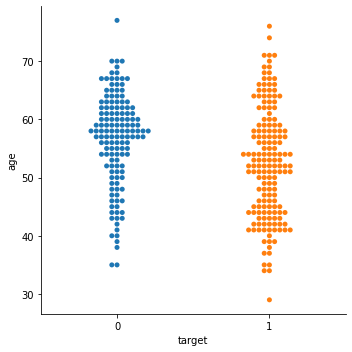

In [114]:
sns.catplot(x='target', y='age', kind='swarm', data=df)

In [120]:
Xtrain = df[['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
ytrain = df[['target']]

#building a model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()             

Optimization terminated successfully.
         Current function value: 0.352135
         Iterations 7


In [121]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           11
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.4892
Time:                        18:18:52   Log-Likelihood:                -106.34
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 1.251e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.6362      0.448     -3.652      0.000      -2.514      -0.758
cp             0.8358      0.184      4.548      0.000       0.476       1.196
trestbps      -0.0123      0.009     -1.442      0.1

In [123]:
Xtrain = df[['sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
ytrain = df[['target']]

#building a model and fitting the data
log_reg2 = sm.Logit(ytrain, Xtrain).fit() 
print('Model 2', log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.352159
         Iterations 7
Model 2                            Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                           10
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.4892
Time:                        18:29:21   Log-Likelihood:                -106.35
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 2.708e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.6318      0.447     -3.654      0.000      -2.507      -0.757
cp             0.8396

In [124]:
Xtrain = df[['sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
ytrain = df[['target']]

#building a model and fitting the data
log_reg3 = sm.Logit(ytrain, Xtrain).fit() 
print('Model 2', log_reg3.summary())

Optimization terminated successfully.
         Current function value: 0.352931
         Iterations 7
Model 2                            Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            9
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.4881
Time:                        18:32:35   Log-Likelihood:                -106.59
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 6.900e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.5503      0.428     -3.624      0.000      -2.389      -0.712
cp             0.8465

In [126]:
Xtrain = df[['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]
ytrain = df[['target']]

#building a model and fitting the data
log_reg3 = sm.Logit(ytrain, Xtrain).fit() 
print('Model 2', log_reg3.summary())

#all variables are significant with this data set

Optimization terminated successfully.
         Current function value: 0.367637
         Iterations 7
Model 2                            Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            6
Date:                Fri, 30 Sep 2022   Pseudo R-squ.:                  0.4668
Time:                        18:35:03   Log-Likelihood:                -111.03
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 2.998e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.3970      0.405     -3.451      0.001      -2.190      -0.604
cp             0.7740

In [ ]:
Predicitng on New DATA

In [128]:
from sklearn.model_selection import train_test_split

X=df[['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=df[['target']]
#y=y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [129]:
#X-train = X_train[['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
#y_train = y_train[['target']]

log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.333149
         Iterations 7


In [130]:
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))

#comparing original and predicted values of y
print('Actual values', list(y_test.values))
print('Predictions :', prediction)

Actual values [array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), a

In [138]:
from sklearn.metrics import (confusion_matrix, accuracy_score)

#confusion matrix
cm = confusion_matrix(y_test, prediction)
print('confusion Matrix : \n', cm)

#accuracy score of the model
print('Test Accuracy = ', accuracy_score(y_test, prediction))

confusion Matrix : 
 [[33  8]
 [ 5 45]]
Test Accuracy =  0.8571428571428571


In [146]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds =roc_curve(y_test, yhat)
roc_auc = auc(fpr, tpr)
print('Area under the ROC curve : %f' % roc_auc)

Area under the ROC curve : 0.900488


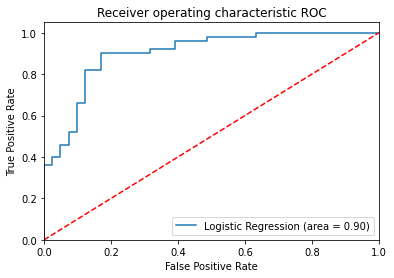

In [147]:
from sklearn.metrics import roc_curve, auc

logit_roc_auc = roc_auc_score(y_test, yhat)
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ROC')
plt.legend(loc="lower right")

plt.show()

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [145]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
# the measure of accuracy for random forest model is .88

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.90      0.88      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [148]:
print(confusion_matrix(y_test,predictions))

[[36  5]
 [ 6 44]]


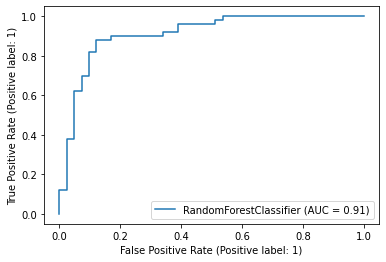

In [149]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.show()
